<h1>KNN Classification </h1>

<h2>KNN Algorithm </h2>
<p>Nearest neighbors is a simple algorithm predict the numerical target based on similarity using distance functions. It is also called a non-parametric technique.

<p>An implementation of KNN regression is to calculate the average of the numerical target of the K nearest neighbors.  Alternativly we may use an inverse distance weighted average of the K nearest neighbors. KNN regression uses the same distance functions as KNN classification.

<P><h2>Distance Functions (Continuous Data) </h2>
    <p>Ecludian Distance $=  \displaystyle \sqrt{\sum _{i=1}^n (X_i- Y_i)^2}$
      <p>Manhattan Distance$ =  \displaystyle \sum _{i=1}^n \left|X_i- Y_i\right|$
  <p>Minikowski Distance$ =  \displaystyle \left[\sum _{i=1}^n \left|X_i- Y_i\right|^q\right]^{\frac{-1}{q}}$
  
  <P><h2>Distance Function (Categorical Data) </h2>
     <p>Hamming Distance$ =  \displaystyle \sum _{i=1}^n \left|X_i- Y_i\right|$ 
       <p>   $\hspace{20mm}X = Y \hspace{10mm} then \hspace{10mm}  D = 0 $
      <p>    $\hspace{20mm}X \neq Y \hspace{10mm} then \hspace{10mm} D = 1$
  
  <p><h2>Standardize/ Normalize Data</h2>
Calculating distance measures directly from the training set values could be biased in the case where variables have different measurement scales or there is a mixture of numerical and categorical variables. For example, if one variable is based on annual income in dollars, and the other is based on age in years then income will have a much higher influence on the distance calculated. One solution is to Normalize the training set using Min-Max or Mean-Std.Dev method.
 
  <p> Standardization
 <p>$X =  \displaystyle \frac{X-X_{min}}{X_{max}-X_{min}}$
  <p> Normalization
 <p>$X =  \displaystyle \frac{X-\mu}{\sigma}$   where  $\mu$ is mean and $\sigma$ is standard deviation
  
<P><h2>Pesudo Code</h2>

<p>Step 1: To classify a new data point $(x_a,x_b)$,
     calculate distance from each training(given) data point $(x_1^i,x_2^i)$
        
Step 2: Sort the distances in ascending order.
    
Step 3: Choose top K data points
    
Step 4: Pick the Class  having most items in Top K data point chosen 

Step 5: Predict data point $(x_a,x_b)$ with highest voting class
    

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

<H1>Read Data from CSV

In [2]:
dfTrain = pd.read_csv('../input/ClassificationDS/ClassificationData.csv')   #Training Dataset
dfTrain.head()

,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
DistinctClasses=np.array(dfTrain['Y'].unique())
print(DistinctClasses)

[0 1]


<h5> Visualize Data

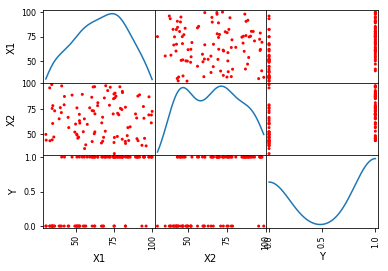

In [4]:
pd.plotting.scatter_matrix(dfTrain, alpha=1, diagonal='kde',color='r')
plt.show()

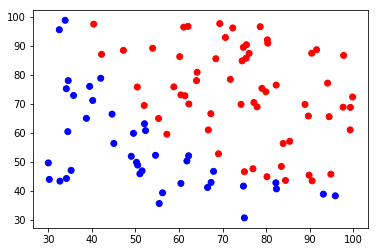

In [5]:
cmap = ListedColormap(['blue', 'red']) 



plt.scatter(dfTrain.loc[:,['X1']].values,dfTrain.loc[:,['X2']].values, c=dfTrain.loc[:,['Y']].values, cmap=cmap)
plt.show()

<h2>Extract Input Feature to <b>X </b>and Label to <b>Y</b></h2>
<h5>X=(X1 &amp; X2 in DS) and Y(Class in DS)   

In [6]:
def extractFeatures(df):
    df_Features=df.iloc[:,0:2]
    df_Label=df.iloc[:,2:3]
    X=df_Features.values
    Y=df_Label.values
    return X,Y

In [7]:
X,Y=extractFeatures(dfTrain)

<h1> Prediction/Accuracy Evaluation

In [8]:
def predict(inputX,trainX,trainY,K):
    trainBatchSize=trainX.shape[0]
    predictBatchSize=inputX.shape[0]
    pY=np.zeros((inputX.shape[0],1))
    distanceList=np.zeros(trainY.shape)
    for i in range(predictBatchSize): 
        
        #Step1:Calculate Distances
        distanceValues=np.linalg.norm(inputX[i,:]-trainX,axis=1)
        distanceList=np.column_stack((distanceValues,trainY))
          
        #Step2: Sort Distances
        sortedList=distanceList[distanceList[:,0].argsort()]
        
       
        #Step3: Pick top K
        topKList=sortedList[:K,:]
                
        
        
        #Step4: GetMost voted class top K    
        DistinctClassesWithCount=np.column_stack((DistinctClasses,np.zeros(DistinctClasses.shape)))
        
        for cls in DistinctClasses:           
            DistinctClassesWithCount[cls,1]= len(topKList[np.where(topKList[:,1]==cls)])
            
    
        
        mostVoted=np.argmax(np.max(DistinctClassesWithCount, axis=1))
        
        pY[i]=mostVoted
            
                    
    
    return pY

<h5>Accurracy on Training Data

In [9]:
def accurracy(Y1,Y2):
    m=np.mean(np.where(Y1==Y2,1,0))    
    return m*100

<h3>Predict using K-Neighbors

In [10]:
K=25
pY=predict(X,X,Y,K) 
print(accurracy(Y, pY))

92.0


<h1>Plotting Hypothesis

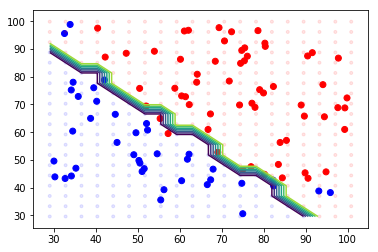

In [11]:
plt.scatter(X[:,0],X[:,1], c=Y[:,0], cmap=cmap) 
###########################################################################
#Predict for each X1 and X2 in Grid 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
u = np.linspace(x_min, x_max, 20) 
v = np.linspace(y_min, y_max, 20) 

U,V=np.meshgrid(u,v)
UV=np.column_stack((U.flatten(),V.flatten())) 
W=predict(UV, X,Y,K) 
plt.scatter(U.flatten(), V.flatten(),  c=W.flatten(), cmap=cmap,marker='.', alpha=0.1)

###########################################################################
#Exact Decision Boundry can be plot with contour
z = np.zeros(( len(u), len(v) )) 
for i in range(len(u)): 
    for j in range(len(v)): 
        uv= np.column_stack((np.array([[u[i]]]),np.array([[v[j]]])))               
        z[i,j] =predict(uv, X,Y,K) 
z = np.transpose(z) 
plt.contour(u, v, z)
###########################################################################
plt.show()